In [12]:
from itertools import product

import pandas as pd
import numpy as np
import scipy.io as scio
from sklearn.svm import SVC

%load_ext autoreload
%autoreload 2
import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
mat = scio.loadmat('ex5data3.mat')

# TODO?: normalize
x = pd.DataFrame(mat['X'])
y = pd.DataFrame(mat['y']).iloc[:, 0]
xval = pd.DataFrame(mat['Xval'])
yval = pd.DataFrame(mat['yval']).iloc[:, 0]

y0 = y[y == 0]
y1 = y[y == 1]
x0 = x.iloc[y0.index]
x1 = x.iloc[y1.index]

In [84]:
C = np.linspace(0.1, 1, 6)
gammas = np.linspace(10, 200, 15)

params = pd.DataFrame(product(C, gammas), columns=['C', 'gamma'])

In [86]:
scores = []
for c, gamma in params[['C', 'gamma']].itertuples(index=False):
    clf = SVC(kernel='rbf', C=c, gamma=gamma)
    clf.fit(x, y)
    scores.append(clf.score(xval, yval))

params.insert(0, 'score', scores, allow_duplicates=True)
index = params.score.idxmax().iloc[0]
print('Best: c={}, gamma={}'.format(params.C[index], params.gamma.iloc[index]))

Best: c=0.28, gamma=77.85714285714286


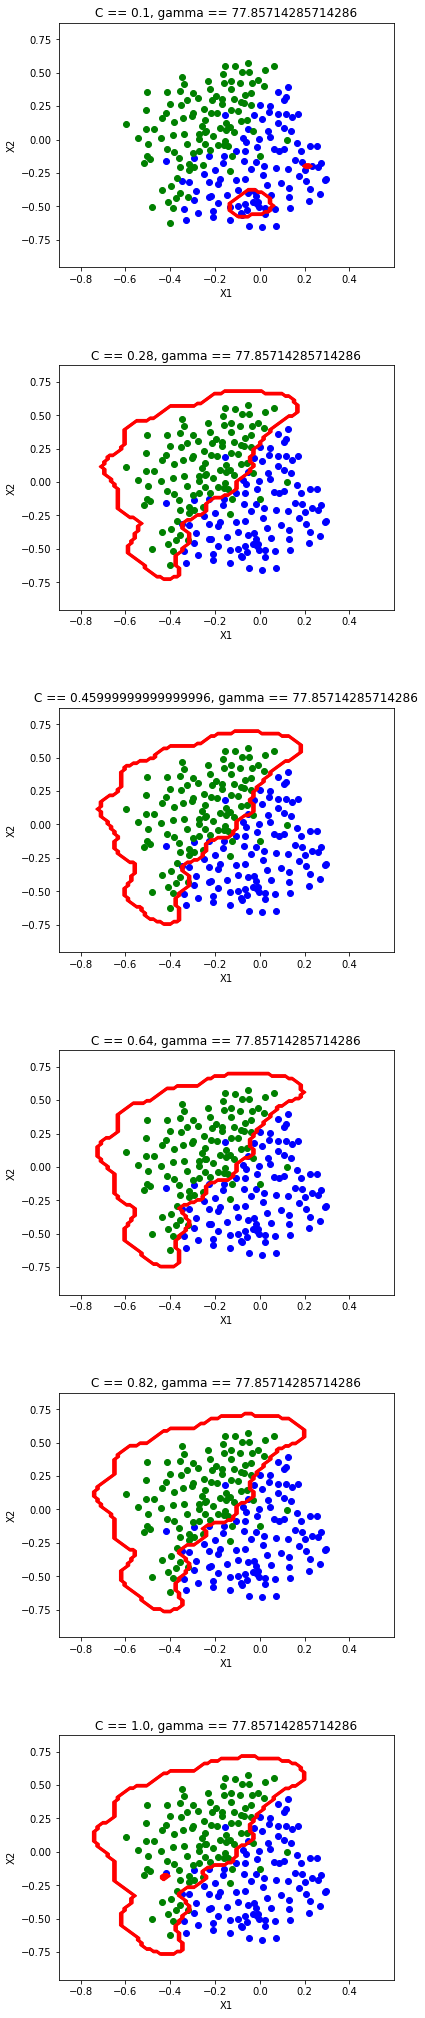

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

xx1, xx2 = np.meshgrid(
    np.linspace(x[0].min() - 0.3, x[0].max() + 0.3, 100),
    np.linspace(x[1].min() - 0.3, x[1].max() + 0.3, 100),
)

fig = plt.figure(figsize=(6, 6*len(C)))
subplots = fig.subplots(len(C), 1)
if not hasattr(subplots, '__iter__'):
    subplots = [subplots]
for c, ax in zip(C, subplots):
    ax.scatter(x.iloc[y0.index, 0], x.iloc[y0.index, 1], c='blue')
    ax.scatter(x.iloc[y1.index, 0], x.iloc[y1.index, 1], c='green')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('C == {}, gamma == {}'.format(c, params.gamma.iloc[index]))
    
    clf = SVC(kernel='rbf', C = c, gamma=gamma)
    clf.fit(x, y)
    prediction = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]) \
        .reshape(xx1.shape)
    ax.contour(xx1, xx2, prediction, colors='red')

fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()